In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from collections import Counter
%matplotlib inline

/Users/shirley/anaconda/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
dfs = [pd.read_csv(f'archive/dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]

for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
data = data.dropna('columns')

In [3]:
def split_artists(data):
    for index, row in data.iterrows():
        if type(row['artist'])==list:
            break
        artists = [row['artist']]

        def check(s, artists):
            artists_list = []
            for item in artists:
                if s in item:
                    artists_list += item.split(s)
                    #print(s,' ', item,' ',artists_list)
                else:
                    artists_list.append(item)
            return artists_list

        artists = check('Featuring', artists)
        artists = check('featuring', artists)
        artists = check('Feat.', artists)
        artists = check(',', artists)
        #artists = check('+', artists)
        data.at[index, 'artist'] = artists
    return data

data = split_artists(data.copy())

In [4]:
data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Hard Working Woman - Live / 1983,[Otis Clay],spotify:track:2g8zPTDvSWlYTZs9ylQQ9L,0.574,0.7630,8,-11.921,0,0.0467,0.23400,0.000039,0.5720,0.916,126.158,364333,4,27.85422,11,0,1980
1,Quatuor pour la fin du temps (Quartet for the ...,[Olivier Messiaen],spotify:track:2Ow0yMUSccQ4vmfq8pyCCF,0.121,0.0238,4,-28.614,1,0.0400,0.97800,0.910000,0.0771,0.030,95.821,420040,4,32.71495,20,0,2000
2,Wokeuplikethis*,"[Playboi Carti , Lil Uzi Vert]",spotify:track:59J5nzL1KniFHnU120dQzt,0.785,0.6200,8,-6.668,1,0.2540,0.01380,0.000000,0.1500,0.478,78.476,235535,4,28.46889,13,1,2010
3,Plug Walk,[Rich The Kid],spotify:track:1ZAyjvIk9YiD76yYy0TEG6,0.876,0.5190,11,-6.531,1,0.1430,0.20200,0.000000,0.1080,0.158,94.981,175230,4,20.94400,9,1,2010
4,Key Largo,[Bertie Higgins],spotify:track:41v56RunWqxgqTD4H2cwOD,0.503,0.6590,0,-6.829,1,0.0356,0.44300,0.000000,0.1530,0.330,101.668,198947,4,21.74949,9,1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41006,Kiko,[Jimmy McGriff],spotify:track:7oHFJ7VuwjeAvEgQbEmM8r,0.853,0.6300,5,-14.193,1,0.0894,0.18700,0.868000,0.1120,0.882,115.674,164467,4,47.68413,8,1,1960
41007,How We Do,"[The Game , 50 Cent]",spotify:track:4PmMVdIFpJTB9WQbmILf4p,0.862,0.6480,4,-7.401,0,0.2510,0.04550,0.000000,0.0332,0.637,98.012,235533,4,23.35783,12,1,2000
41008,G. Rossini: Der Barbier von Sevilla/Die Verleu...,[Staatskapelle Berlin],spotify:track:41C2tPBf2JmHafRunOkNVk,0.349,0.1230,0,-19.248,1,0.1000,0.91000,0.000035,0.1330,0.157,76.240,268907,3,48.43741,11,0,1960
41009,Bella Ciao (Lied der italienischen Partisanen),[Hannes Wader],spotify:track:2OYLSRaVD3Dp35NwoS1b8r,0.457,0.5740,9,-16.066,1,0.2590,0.79300,0.000000,0.7590,0.709,109.195,196333,4,37.54967,9,0,1970


In [5]:
d = dict(data['uri'].value_counts())
len(d.keys())

40560

In [6]:
#data.loc[data['uri']=='spotify:track:7tFiyTwD0nx5a1eklYtX2J']

In [7]:
# drop duplicate uri
drop_list = []
for k, v in d.items():
    if d[k]>1:
        decade = min(data.loc[data['uri']==k]['decade'])
        for index, row in data.loc[data['uri']==k].iterrows():
            if row['decade']>decade:
                drop_list.append(index)
data = data.drop(drop_list).reset_index()

In [8]:
data=data.drop(['index'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40560 entries, 0 to 40559
Data columns (total 20 columns):
track               40560 non-null object
artist              40560 non-null object
uri                 40560 non-null object
danceability        40560 non-null float64
energy              40560 non-null float64
key                 40560 non-null int64
loudness            40560 non-null float64
mode                40560 non-null int64
speechiness         40560 non-null float64
acousticness        40560 non-null float64
instrumentalness    40560 non-null float64
liveness            40560 non-null float64
valence             40560 non-null float64
tempo               40560 non-null float64
duration_ms         40560 non-null int64
time_signature      40560 non-null int64
chorus_hit          40560 non-null float64
sections            40560 non-null int64
target              40560 non-null int64
decade              40560 non-null int64
dtypes: float64(10), int64(7), object(3)
memory 

## Data Analysis

In [9]:
# label_dict = {}
# embedding_dict = {}
newdata = data.loc[data['decade']==2010]

label = newdata['target']

features = newdata.drop(['track', 'artist', 'uri','target'], axis=1).values
scalar = StandardScaler()
scalar.fit(features)
features = scalar.transform(features)

# for index, row in data.iterrows():
#     label_dict[row['uri']] = row['target']
#     embedding_dict[row['uri']] = features[index]

In [10]:
n = len(list(label))
G = nx.Graph()
#nodes_list = list(data['uri'])
G.add_nodes_from(list(range(n)))

In [18]:
# for i in range(n):
#     if i%1000==1:
#         print('####Processing: ', i)
#     v1 = features[i]
    
#     for j in range(n):
#         v1 = embedding_dict[i]
#         v2 = embedding_dict[j]
#         similarity = abs(v1@v2/(np.linalg.norm(v1)*np.linalg.norm(v2)))
#         if similarity>1.000001:
#             print(v1, ' ',v2,' ', similarity)
#         if similarity>0.5:
#             G.add_edge(i, j)
nfeatures = normalize(features, norm="l2")
similarity = np.triu(np.array(nfeatures@nfeatures.T),1)
t = np.max(similarity)*0.85
x, y = np.where(similarity>t)
edges = list(zip(list(x), list(y)))
print(len(edges))
G.add_edges_from(edges)
# print('nodes: ',,', edges:',G.number_of_edges())

36449


In [19]:
density = nx.density(G)
transitivity = nx.transitivity(G)
average_clustering_coefficient = nx.average_clustering(G)

#############################################################
print (f'=== Network statistics ===')

print (f'Number of nodes: {G.number_of_nodes()}')
print (f'Number of edges: {G.number_of_edges()}')
print (f'Network density: {density:.4f}')
print (f'Transitivity: {transitivity:.4f}')
print (f'Average Clustering Coefficient: {average_clustering_coefficient:.4f}')
print (f'======')

=== Network statistics ===
Number of nodes: 6262
Number of edges: 36449
Network density: 0.0019
Transitivity: 0.4224
Average Clustering Coefficient: 0.3060


In [20]:
def get_degrees (net):
    degrees = [val for (node, val) in net.degree().items()]
    degree_sequence = np.array(degrees)
    return degree_sequence
def plot_degree_distribution (net, color='r'):

    degree_sequence = get_degrees (net)
    num_of_nodes = Counter(degree_sequence)
    x_vals = list(num_of_nodes.keys())
    y_vals = [val for (key, val) in num_of_nodes.items()]
    print(x_vals[0],y_vals[0])
    print(len(x_vals))
    
    plt.plot(x_vals, y_vals, color, linestyle='None', marker='o', markersize=2.0)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel ('Degree')
    plt.ylabel ('Number of nodes with degree')
    plt.title ('Degree distribution on log-log scale')
    

8 255
112


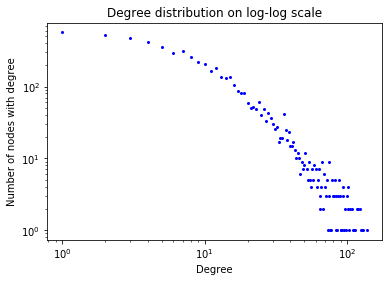

In [21]:
plot_degree_distribution (G, color='b')

In [48]:
n = len(list(label))
G2 = nx.Graph()
#nodes_list = list(data['uri'])
G2.add_nodes_from(list(range(n)))

In [49]:
similarity = []
for i in range(n):
    if i%1000==1:
        print('####Processing: ', i)
    v1 = np.array(features[i])
    s = np.linalg.norm(v1-np.array(features), axis=1)
    similarity.append(s)
similarity = np.array(similarity).T
    
#     for j in range(n):
#         v1 = embedding_dict[i]
#         v2 = embedding_dict[j]
#         similarity = abs(v1@v2/(np.linalg.norm(v1)*np.linalg.norm(v2)))
#         if similarity>1.000001:
#             print(v1, ' ',v2,' ', similarity)
#         if similarity>0.5:
#             G.add_edge(i, j)
t = np.mean(similarity)*0.3
x, y = np.where(similarity<t)
edges = list(zip(list(x), list(y)))
edges = [e for e in edges if e[0]>e[1]]
print(len(edges))
G2.add_edges_from(edges)
print('nodes: ',G2.number_of_nodes(),', edges:',G2.number_of_edges())

####Processing:  1
####Processing:  1001
####Processing:  2001
####Processing:  3001
####Processing:  4001
####Processing:  5001
####Processing:  6001
29357
nodes:  6262 , edges: 29357


=== Network statistics ===
Number of nodes: 6262
Number of edges: 29357
Network density: 0.0015
Transitivity: 0.3338
Average Clustering Coefficient: 0.1940
4 222
114


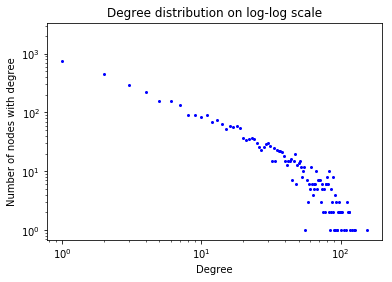

In [50]:
density = nx.density(G2)
transitivity = nx.transitivity(G2)
average_clustering_coefficient = nx.average_clustering(G2)

#############################################################
print (f'=== Network statistics ===')

print (f'Number of nodes: {G2.number_of_nodes()}')
print (f'Number of edges: {G2.number_of_edges()}')
print (f'Network density: {density:.4f}')
print (f'Transitivity: {transitivity:.4f}')
print (f'Average Clustering Coefficient: {average_clustering_coefficient:.4f}')
print (f'======')
plot_degree_distribution (G2, color='b')

In [26]:
np.array([1,1,1])-np.array([[2,2,2],[3,3,3],[4,6,7]])

array([[-1, -1, -1],
       [-2, -2, -2],
       [-3, -5, -6]])

## Construct Graph

In [9]:
scalar = StandardScaler()
scalar.fit(data.drop(['track', 'artist', 'uri','target'], axis=1).values)

def getDecadeData(decade):
    graphData = data.loc[data['decade']==decade]
    label = graphData['target']
    artist = graphData['artist']
    uri = graphData['uri']
    track = graphData['track']
    features = graphData.drop(['track', 'artist', 'uri','target'], axis=1).values
#     scalar = StandardScaler()
#     scalar.fit(features)
    features = scalar.transform(features)
    return features, list(label), list(artist), list(uri), list(track)

#getDecadeData(2010)
decadesList = [1960,1970,1980,1990,2000,2010]
nodeIdOffset = [0]

In [10]:
data['decade'].value_counts()

1960    8625
1970    7685
1980    6803
2010    6262
2000    5768
1990    5417
Name: decade, dtype: int64

In [11]:
def constructGraphWithinDecade(G, threshold):
    for i, decade in enumerate(decadesList):
        features, label, artist, uri, track = getDecadeData(decade)
        n = len(list(label))
        offset = nodeIdOffset[i]
        for i in range(offset, offset+n):
            G.add_node(i, feature=features[i-offset], label=label[i-offset], artist=artist[i-offset], uri=uri[i-offset], track=track[i-offset])
        #G.add_nodes_from(list(range(offset, offset+n)))
        nodeIdOffset.append(offset+n)
        print('Decade ',decade, ' nodes: ',n, ' id range: ',offset,offset+n)
  
        nfeatures = normalize(features, norm="l2")
        similarity = np.triu(np.array(nfeatures@nfeatures.T),1)
        t = np.max(similarity)*threshold
        x, y = np.where(similarity>t)
        x, y = x+offset, y+offset
        edges = list(zip(list(x), list(y)))
        print('edges: ',len(edges))
        G.add_edges_from(edges)

In [12]:
def constructGraphCrossDecade(G, threshold):
    for i in range(1, len(decadesList)):
        features1 = getDecadeData(decadesList[i-1])[0]
        features2 = getDecadeData(decadesList[i])[0]
        
        nfeatures1 = normalize(features1, norm="l2")
        nfeatures2 = normalize(features2, norm="l2")
        #print(nfeatures1.shape, nfeatures2.shape)
        similarity = np.triu(np.array(nfeatures1@nfeatures2.T),1)
        #print(similarity.shape)
        t = np.max(similarity)*threshold
        x, y = np.where(similarity>t)
        x, y = x+nodeIdOffset[i-1], y+nodeIdOffset[i]
        edges = list(zip(list(x), list(y)))
        print('Decades: ',decadesList[i-1] ,decadesList[i] ,'edges: ',len(edges))
        G.add_edges_from(edges)

In [13]:
trackNet = nx.Graph()
constructGraphWithinDecade(trackNet, 0.8)
print("node: ", trackNet.number_of_nodes(), ' edges: ',trackNet.number_of_edges())
constructGraphCrossDecade(trackNet, 0.85)
print("node: ", trackNet.number_of_nodes(), ' edges: ',trackNet.number_of_edges())

Decade  1960  nodes:  8625  id range:  0 8625
edges:  202320
Decade  1970  nodes:  7685  id range:  8625 16310
edges:  65886
Decade  1980  nodes:  6803  id range:  16310 23113
edges:  54349
Decade  1990  nodes:  5417  id range:  23113 28530
edges:  31785
Decade  2000  nodes:  5768  id range:  28530 34298
edges:  69885
Decade  2010  nodes:  6262  id range:  34298 40560
edges:  118123
node:  40560  edges:  542348
Decades:  1960 1970 edges:  15986
Decades:  1970 1980 edges:  7582
Decades:  1980 1990 edges:  5532
Decades:  1990 2000 edges:  8480
Decades:  2000 2010 edges:  17864
node:  40560  edges:  597792


In [14]:
# density = nx.density(trackNet)
# transitivity = nx.transitivity(trackNet)
# average_clustering_coefficient = nx.average_clustering(trackNet)

#############################################################
print (f'=== Network statistics ===')

print (f'Number of nodes: {trackNet.number_of_nodes()}')
print (f'Number of edges: {trackNet.number_of_edges()}')

# print (f'Network density: {density:.4f}')
# print (f'Transitivity: {transitivity:.4f}')
# print (f'Average Clustering Coefficient: {average_clustering_coefficient:.4f}')
# print (f'======')

=== Network statistics ===
Number of nodes: 40560
Number of edges: 1535654
Network density: 0.0019
Transitivity: 0.3645
Average Clustering Coefficient: 0.3466


In [15]:
#trackNet.nodes[0]

In [14]:
#map trackNet node id and artist node id
data_artist = []
trackNet_ids = trackNet.nodes()
for i in trackNet_ids:
    data_artist.append(trackNet.nodes[i]['artist'])
artist_id_map = {}
for index, dlist in enumerate(data_artist):
    for d in dlist:
        if d not in artist_id_map:
            artist_id_map[d] = [index]
        else:
            artist_id_map[d].append(index)

In [15]:
#build artist graph
artist_node = []
artist_edge = []
artist_net = nx.Graph()
for dlist in data_artist:
    for i, d in enumerate(dlist):
        if (d not in artist_node):
            artist_node.append(d)
            artist_net.add_node(d)
        for j in range(len(dlist[i+1:-1])):
            if [d, dlist[j]] not in artist_edge and [dlist[j],d] not in artist_edge:
                artist_edge.append([d, dlist[j]])
                artist_net.add_edge(d, dlist[j])

In [16]:
def print_network_statistics (net):
    nodes = len(net.nodes())
    edges = len(net.edges())
    density = nx.density(net)
    transitivity = nx.transitivity(net)
    average_clustering_coefficient = nx.average_clustering(net)

    print (f'=== Network statistics ===')
    print (f'Number of nodes: {nodes}')
    print (f'Number of edges: {edges}')
    print (f'Network density: {density:.4f}')
    print (f'Transitivity: {transitivity:.4f}')
    print (f'Average Clustering Coefficient: {average_clustering_coefficient:.4f}')
    print (f'======')
    
#print_network_statistics(artist_net)

In [17]:
def GetArtistClusters(artist_net, artist_id_map):
    artist_clusters = []
    for node in artist_net.nodes():
        artists = sorted(list(nx.bfs_tree(artist_net,node)))
        if len(artists) > 1 and artists not in artist_clusters:
            artist_clusters.append(artists)
    artist_clusters_id = []
    for cluster in artist_clusters:
        id_cluster = []
        for name in cluster:
            for e in artist_id_map.get(name):
                if e not in id_cluster:
                    id_cluster.append(e)
        artist_clusters_id.append(id_cluster)
    return artist_clusters_id
artist_clusters_id = GetArtistClusters(artist_net, artist_id_map)

In [18]:
def AddEdgesFromRelatedArtists(trackNet, artist_clusters_id, threthold):
    for cluster in artist_clusters_id:
        for i in range(len(cluster)):
            for j in range(i,len(cluster)):
                nfeatures1 = trackNet.nodes[i]['feature']
                nfeatures2 = trackNet.nodes[j]['feature']
                similarity = nfeatures1@nfeatures2.T / (np.linalg.norm(nfeatures1) * np.linalg.norm(nfeatures2))
                if similarity >= threthold:
                    trackNet.add_edge(i,j)
AddEdgesFromRelatedArtists(trackNet, artist_clusters_id, 0.6)

In [ ]:
print_network_statistics(trackNet)

### Node Classification: Random Walk

In [58]:
from gensim.models import Word2Vec
from collections import defaultdict
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [100]:
def compute_transition_probs(G, p, q):
    transition_probs = defaultdict(dict)
    for s in G.nodes():
        for c in G.neighbors(s):
            tp_list = []
            for d in G.neighbors(c):
                tp = 1.0/q
                if s == d:
                    tp = 1.0/p
                elif G.has_edge(s, d):
                    tp = 1.0
                tp_list.append(tp)
            transition_probs[str(s)][str(c)] = np.array([i/sum(tp_list) for i in tp_list])
    return transition_probs

def generate_walks(G, transition_probs, walks_per_node, length):
    np.random.seed(0)
    walks = []
    for s in G.nodes():
        if list(G.neighbors(s)) == []:
            continue
        for i in range(walks_per_node):
            walk = [str(s)]
            neighbors = list(G.neighbors(s))
            walk.append(str(np.random.choice(neighbors, 1)[0]))
            step = 1
        while step<length-1 and list(G.neighbors(int(walk[-1]))) != []:
            pre = walk[-2]
            curr = walk[-1]
            trans_probs = transition_probs[pre][curr]
            neighbors = list(G.neighbors(int(curr)))
            walk.append(str(np.random.choice(list(neighbors), p=trans_probs)))
            step += 1
        walks.append(walk)
    np.random.shuffle(walks)
    return walks

def generate_embeddings(walks, dimensions, window_size, num_workers, p, q):
    model = Word2Vec(walks, size=dimensions, window=window_size, min_count=0, sg=1, workers=num_workers,seed=0)
    embeddings = model.wv
    return model, embeddings

def Node2vec(p, q, walks, length, workers, d, window):
    transition_probs = compute_transition_probs(trackNet, p, q)
    walk = generate_walks(trackNet, transition_probs, walks, length)
    model, node2vec_embeddings = generate_embeddings(walk, d, window, workers, p, q)
    return walk, model, node2vec_embeddings

In [68]:
p=0.25 # Return parameter
q=0.25 # In-out parameter
walks=10 # Walks per node
length=80 # Length of each walk
d=128 # Dimension of output embeddings 
window=10 # Window size for word2vec
workers=4 # Number of workers to assign for random walk and word2vec

walk, model, node2vec_embeddings = Node2vec(p, q, walks, length, workers, d, window)

In [101]:
walk2, model2, node2vec_embeddings2 = Node2vec(p, q, walks, length, workers, 64, window)

In [69]:
labels = [trackNet.nodes[n]['label'] for n in sorted(list(trackNet.nodes()))]

In [ ]:
def evaluate(G, labelsList, word_vec):

    classifiers = {}
    
    embeddings = []
    labels = []
    cnt = 0
    for i, node in enumerate(sorted(list(G.nodes()))):
        if str(node) in word_vec.vocab:
            embeddings.append(list(word_vec[str(node)])+list(trackNet.nodes[node]['feature']))
            #embeddings.append(word_vec[str(node)])
            labels.append(labelsList[i])
        else:
            #embeddings.append([])
            cnt+=1
    embeddings = np.asarray(embeddings)
    print('missing embeddings: ', cnt)

    models = {
                "                   Logistic_Regression": OneVsRestClassifier(LogisticRegression()),
                "                         Decision Tree": DecisionTreeClassifier(),
                "Support Vector Machine (Linear Kernel)": LinearSVC(),
                "   Support Vector Machine (RBF Kernel)": SVC(),
                "                        Neural Network": MLPClassifier(),
                "                         Random Forest": RandomForestClassifier()
            }
    
    #X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, train_size=0.7, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, train_size=0.7, random_state=42)
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")
        
    for name, model in models.items():
        predict = model.predict(X_test)
        accuracy = accuracy_score(y_test, predict)

        auc = roc_auc_score(y_test, predict)
        precision = precision_score(y_test, predict)
        recall = recall_score(y_test, predict)
        F1 = f1_score(y_test,predict)
        print(name + ": accuracy {:.2f}%".format(accuracy * 100) + ", AUC {:.2f}".format(auc) + ", F1 {:.2f}".format(F1) + ", precision {:.2f}%".format(precision*100) + ", recall {:.2f}%".format(recall*100))


In [96]:
node2vec_embeddings

In [97]:
evaluate(trackNet, labels, node2vec_embeddings)

missing embeddings:  285
                   Logistic_Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                   Logistic_Regression: accuracy 76.17%, AUC 0.76, F1 0.77, precision 72.75%, recall 82.50%
                         Decision Tree: accuracy 70.40%, AUC 0.70, F1 0.70, precision 69.95%, recall 69.92%
Support Vector Machine (Linear Kernel): accuracy 76.15%, AUC 0.76, F1 0.77, precision 72.60%, recall 82.78%
   Support Vector Machine (RBF Kernel): accuracy 77.84%, AUC 0.78, F1 0.80, precision 72.70%, recall 88.06%
                        Neural Network: accuracy 79.75%, AUC 0.80, F1 0.80, precision 77.29%, recall 83.36%
                         Random Forest: accuracy 75.13%, AUC 0.75, F1 0.74, precision 75.40%, recall 73.44%


In [109]:
evaluate(trackNet, labels, node2vec_embeddings2)

missing embeddings:  285
                   Logistic_Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                   Logistic_Regression: accuracy 76.08%, AUC 0.76, F1 0.77, precision 72.69%, recall 82.36%
                         Decision Tree: accuracy 71.72%, AUC 0.72, F1 0.71, precision 71.27%, recall 71.28%
Support Vector Machine (Linear Kernel): accuracy 76.14%, AUC 0.76, F1 0.77, precision 72.51%, recall 82.99%
   Support Vector Machine (RBF Kernel): accuracy 78.40%, AUC 0.79, F1 0.80, precision 73.25%, recall 88.40%
                        Neural Network: accuracy 79.60%, AUC 0.80, F1 0.80, precision 77.29%, recall 82.92%
                         Random Forest: accuracy 76.48%, AUC 0.76, F1 0.76, precision 76.38%, recall 75.61%
